## Data Imputation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("Data/titanic_toy.csv")
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [3]:
df.head(8)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
5,NaN,8.4583,0,0
6,54.0,51.8625,0,0
7,2.0,21.0750,4,0


In [4]:
df.tail(10)

,Age,Fare,Family,Survived
881,33.0,7.8958,0,0
882,22.0,10.5167,0,0
883,28.0,10.5000,0,0
884,25.0,7.0500,0,0
885,39.0,29.1250,5,0
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1
890,32.0,7.7500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [7]:
df.shape

(891, 4)

In [8]:
df.isnull()

,Age,Fare,Family,Survived
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
886,False,False,False,False
887,False,False,False,False
888,True,False,False,False
889,False,True,False,False


In [9]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [10]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [11]:
df.columns

Index(['Age', 'Fare', 'Family', 'Survived'], dtype='object')

In [12]:
df["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889        NaN
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [13]:
df[["Age","Fare"]]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,NaN


In [14]:
age_mean =df['Age'].mean()
age_median =df['Age'].median()
age_mode =df['Age'].mode()

fare_mean =df['Fare'].mean()
fare_median =df['Fare'].median()
fare_mode =df['Fare'].mode()

In [15]:
M=[age_mean,age_median,age_mode,fare_mean,fare_median,fare_mode]
for i in M:
    print(i)

29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64
32.279338297872336
14.4542
0    8.05
Name: Fare, dtype: float64


## Replacing null values

In [17]:
df['Imputated_Age_mean']=df['Age'].fillna(age_mean)
df['Imputated_Fare_mean']=df['Fare'].fillna(fare_mean)
df

,Age,Fare,Family,Survived,Imputated_Age_mean,Imputated_Fare_mean
0,22.0,7.2500,1,0,22.000000,7.250000
1,38.0,71.2833,1,1,38.000000,71.283300
2,26.0,7.9250,0,1,26.000000,7.925000
3,35.0,53.1000,1,1,35.000000,53.100000
4,35.0,8.0500,0,0,35.000000,8.050000
...,...,...,...,...,...,...
886,27.0,13.0000,0,0,27.000000,13.000000
887,19.0,30.0000,0,1,19.000000,30.000000
888,NaN,23.4500,3,0,29.699118,23.450000
889,26.0,NaN,0,1,26.000000,32.279338


In [18]:
df.isnull().sum()

Age                    177
Fare                    45
Family                   0
Survived                 0
Imputated_Age_mean       0
Imputated_Fare_mean      0
dtype: int64

## Using Mean

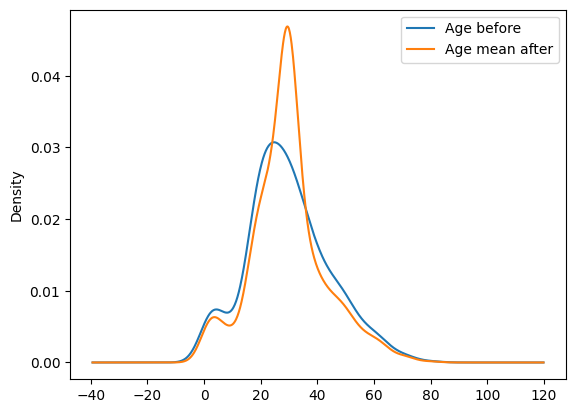

In [32]:
df['Age'].plot(kind='kde',label="Age before")
df['Imputated_Age_mean'].plot(kind='kde',label="Age mean after")
plt.legend()

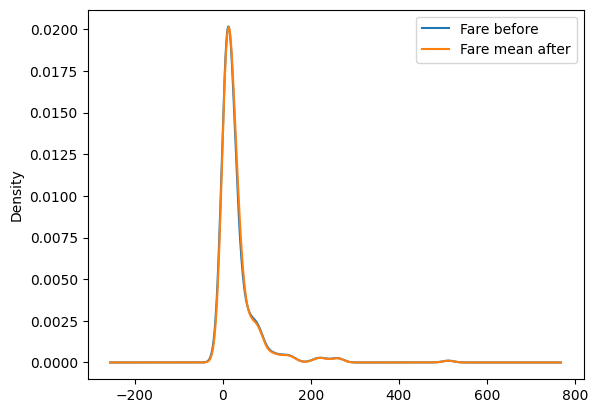

In [33]:
df['Fare'].plot(kind='kde',label="Fare before")
df['Imputated_Fare_mean'].plot(kind='kde',label="Fare mean after")
plt.legend()

## Using Median

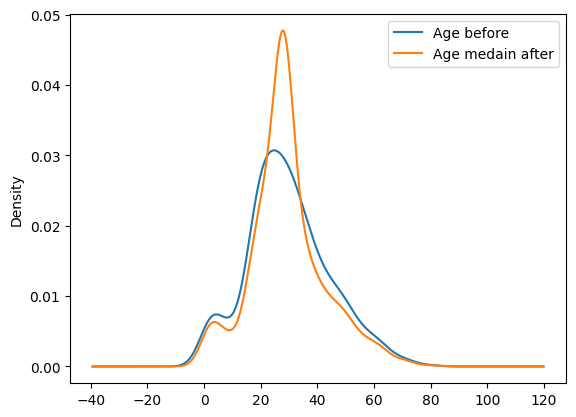

In [36]:
df['Imputated_Age_median']=df['Age'].fillna(age_median)
df['Imputated_Fare_median']=df['Fare'].fillna(fare_median)
df['Age'].plot(kind='kde',label="Age before")
df['Imputated_Age_median'].plot(kind='kde',label="Age medain after")
plt.legend()

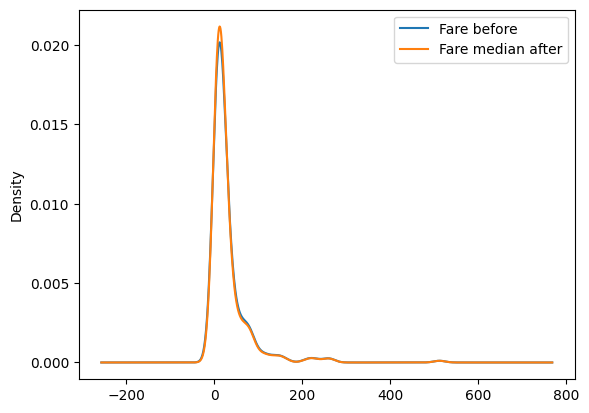

In [37]:
df['Fare'].plot(kind='kde',label="Fare before")
df['Imputated_Fare_median'].plot(kind='kde',label="Fare median after")
plt.legend()

## Using Mode

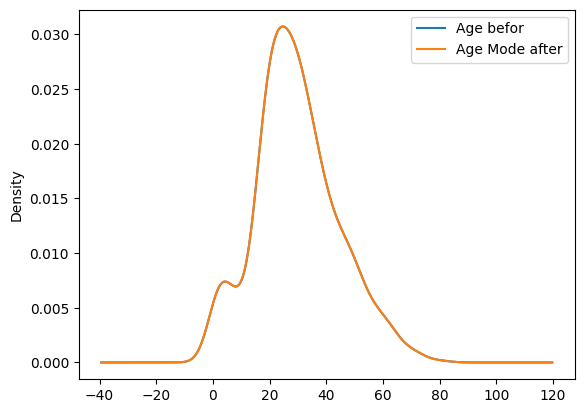

In [39]:
df['Imputated_Age_mode']=df['Age'].fillna(age_mode)
df['Imputated_Fare_mode']=df['Fare'].fillna(fare_mode)
df['Age'].plot(kind='kde',label="Age befor")
df['Imputated_Age_mode'].plot(kind='kde',label="Age Mode after")
plt.legend()

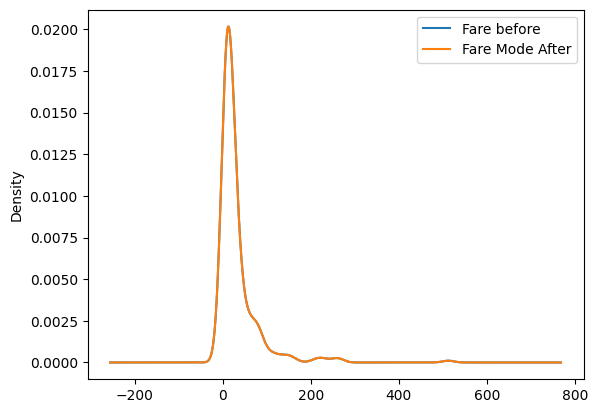

In [40]:
df['Fare'].plot(kind='kde',label="Fare before")
df['Imputated_Fare_mode'].plot(kind='kde',label="Fare Mode After")
plt.legend()

## Conclusion
- For Age the we will choose Mode as it perfectly fits the curve
- For Fare we will choose median or mode as they both are same